In [3]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=120
plt.rcParams['figure.facecolor']='w'
from scipy.optimize import curve_fit
from scipy import stats
from scipy.stats import norm
import random as rd
import pandas as pd
from pandas import *

## About

This code file is where I start doing actual data analysis. First I plot 12-hour trail-smoothed counts/sec data and %deviation from predip_avg manually for every datafile. Then I write a function that takes in filename, NM station number, kind of plot, length of smoothening windown and the 3 timestamps as inputs and generates the relevant time series plot (with the 3 marked timestamps). However, this turns out to be rather primitive in hindsight, since the function doesn't work even if a single of the 5 NM stations' data doesn't exist or has NaN values (plus it works for just 5 stations). The next code file improves upon this

In [3]:
# Check different styles of plotting 
#plt.style.available

# Command to revert to default styling
#plt.rcParams.update(plt.rcParamsDefault)

# Things done 

1) Starting backwards from 2015, 1st FD event of every year considered. Times of CME Shock arrival, start and end times of magnetic cloud (MC), numbering of ICME, all taken from Bhattacharjee et al (2022)

2) All NM Stations' data (as per availability) with low cutoff rigidity (0.01-0.21 GV) and all possible altitudes considered. (starting with low CR stations since most pronounced decreases are expected there). 

3) Time series data (1-hour resolution) of ~48 hours before start of CME Shock and ~48 hours after end of MC (as given in Bhattacharjee et al, 2022) taken from nmdb.eu/nest. These 3 parameters (CME shock, MC start, MC end) plotted onto NM time series data.

4) For every station, data smooted out with a moving average of 12 hour window. Currently it is trail-smoothed, so the data points before affect the data point after. I'm not sure if this smoothing is better than centrally smoothing data, where every smoothed data point is an average of +6hr and -6hr data points, 1-hr resolution. An example of smoothed and non-smoothed data plotted with time.

5) Arithmetic mean of smoothed NM data of every station found, over the entire time period. Then, % deviation of every 1 hr validated, 12 hour trailing-smoothed data point calculated from this arithmetic mean. This is plotted with time.

6) % deviation data also smoothed trailingly over a 12 hour window, and its time series is plotted.

## Steps 1-3 in Code 0 file

## Step 4 - Plotting raw and 12-hr smoothed data

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
108    112.889167
109    112.882500
110    112.853333
111    112.907500
112    112.930000
Name: 4, Length: 113, dtype: float64


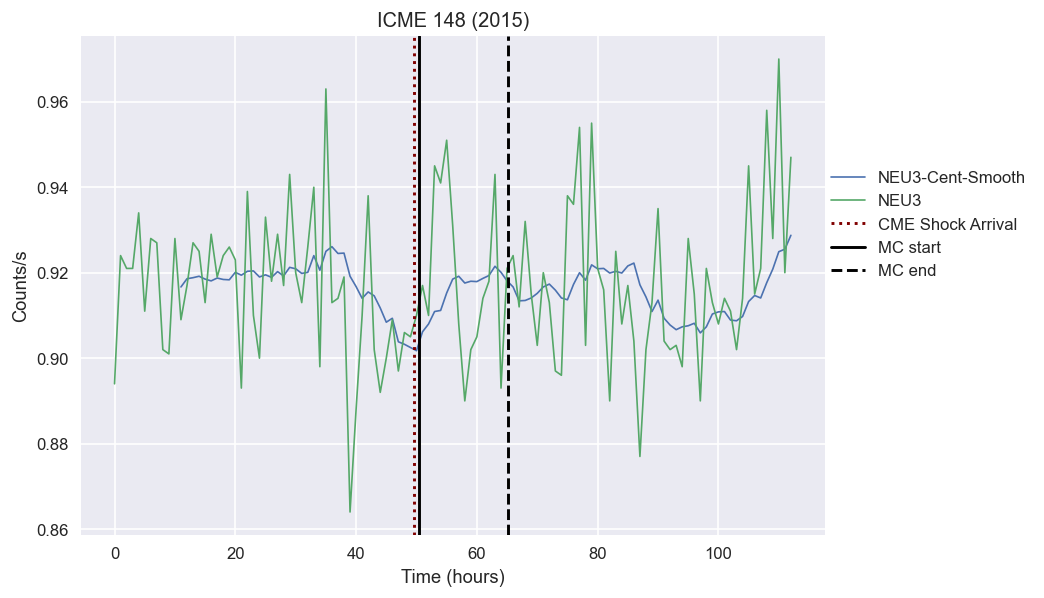

In [5]:
#### 2015 ###############
filename = "2015_lowrig.txt" 
df = read_csv(filename, delimiter=';',header=None)
neu3, sopb, sopo, mrny, tera = df[1],df[2],df[3],df[4],df[5]
time = np.array([i for i in range(0,113)])
#plt.subplot(rows, columns,1)

##### Defining centralised moving averages over "window" length of hours using Pandas, all stations' data
window = 12
lhs = int((window-1)/2)

#for i in range(lhs, len(neu3)-lhs):
    #mavg_cent_neu3[i] = np.mean(neu3[i-lhs:i+lhs]) 
    #### Fix this to get correct smoothing!!!!!!

#print(mavg_cent_neu3)
    
d = pd.Series(neu3)
mavg_cent_neu3 = d.rolling(window).mean()

d = pd.Series(sopb)
mavg_cent_sopb = d.rolling(window).mean()

d = pd.Series(sopo)
mavg_cent_sopo = d.rolling(window).mean()

d = pd.Series(mrny)
mavg_cent_mrny = d.rolling(window).mean()

d = pd.Series(tera)
mavg_cent_tera = d.rolling(window).mean()

print(mavg_cent_mrny)

####### Plotting 12-hour centrally smoothed NM data and actual NM data for all stations individually
####### Please plot only one station at a time to observe clearly, code written for all 

plt.plot(time, mavg_cent_neu3, linewidth=1, label='NEU3-Cent-Smooth' )
plt.plot(time, neu3, linewidth=1, label='NEU3' )

#plt.plot(time, mavg_cent_sopb, linewidth=1, label='SOPB-Cent-Smooth' )
#plt.plot(time, sopb, linewidth=1, label='SOPB' )

#plt.plot(time, mavg_cent_sopo, linewidth=1, label='SOPO-Cent-Smooth' )
#plt.plot(time, sopo, linewidth=1, label='SOPO' )

#plt.plot(time, mavg_cent_mrny, linewidth=1, label='MRNY-Cent-Smooth-12hr' )
#plt.plot(time, mrny, linewidth=1, label='MRNY 1hr data' )

#plt.plot(time, mavg_cent_tera, linewidth=1, label='TERA-Cent-Smooth' )
#plt.plot(time, tera, linewidth=1, label='TERA' )


# Labelling axes
plt.xlabel('Time (hours)')
plt.ylabel("Counts/s")

# Zoom
#plt.xlim(40,70)

# Shock and MC start and end times (corrected for smoothing window adjustments)
plt.axvline(49.63, color='maroon', linestyle=':', label='CME Shock Arrival')
plt.axvline(50.47, color='black', label='MC start')
plt.axvline(65.1, color='black', linestyle='--', label="MC end")


# Cosmetics
plt.style.use('seaborn')
plt.title("ICME 148 (2015)")
plt.legend(loc=(1,0.50))
plt.show()



## Step 5 - % deviation of smoothed data 

In [35]:
###### Arithmetic means of smoothed NM data for all stations to find % deviation from
avg_neu3_smooth = np.mean(mavg_cent_neu3)
avg_sopb_smooth = np.mean(mavg_cent_sopb)
avg_sopo_smooth = np.mean(mavg_cent_sopo)
avg_mrny_smooth = np.mean(mavg_cent_mrny)
avg_tera_smooth = np.mean(mavg_cent_tera)


##### Constructing % mean deviation arrays for each station using average values of smoothed data calculated
percent_meandevi_neu3    = np.zeros(len(mavg_cent_neu3))
for i in range(0,len(mavg_cent_neu3)):
    percent_meandevi_neu3[i] = ((mavg_cent_neu3[i] - avg_neu3_smooth)/avg_neu3_smooth)*100
                                
for i in range(0,len(mavg_cent_sopb)):
    percent_meandevi_sopb    = np.empty(len(mavg_cent_sopb))
    percent_meandevi_sopb[i] = ((mavg_cent_sopb[i] - avg_sopb_smooth)/avg_sopb_smooth)*100
    
for i in range(0,len(mavg_cent_sopo)):
    percent_meandevi_sopo    = np.empty(len(mavg_cent_sopo))
    percent_meandevi_sopo[i] = ((mavg_cent_sopo[i] - avg_sopo_smooth)/avg_sopo_smooth)*100
    
for i in range(0,len(mavg_cent_mrny)):
    percent_meandevi_mrny    = np.empty(len(mavg_cent_mrny))
    percent_meandevi_mrny[i] = ((mavg_cent_mrny[i] - avg_mrny_smooth)/avg_mrny_smooth)*100
    
for i in range(0,len(mavg_cent_tera)):
    percent_meandevi_tera    = np.empty(len(mavg_cent_tera))
    percent_meandevi_tera[i] = ((mavg_cent_tera[i] - avg_tera_smooth)/avg_tera_smooth)*100

In [36]:
percent_meandevi_neu3   ### to verify the correctness of array

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,  0.06474778,  0.27397407,  0.30126445,  0.33765164,
        0.26487727,  0.2193933 ,  0.29216766,  0.25578048,  0.24668368,
        0.43771638,  0.36494202,  0.46500677,  0.47410356,  0.31945805,
        0.37403882,  0.31036125,  0.45590997,  0.34674843,  0.56507152,
        0.52868434,  0.410426  ,  0.43771638,  0.86526576,  0.49229715,
        0.9744273 ,  1.09268564,  0.91984653,  0.92894333,  0.33765164,
        0.07384457, -0.22634967, -0.06260736, -0.1626721 , -0.47196314,
       -0.83583495, -0.7357702 , -1.33615869, -1.39983626, -1.48170741,
       -1.56357857, -1.08144842, -0.88131893, -0.56293109, -0.53564071,
       -0.08989774,  0.26487727,  0.33765164,  0.16481253,  0.2102965 ,
        0.20119971,  0.28307086,  0.35584523,  0.5923619 ,  0.43771638,
        0.2193933 ,  0.06474778, -0.29002724, -0.28093044, -0.21

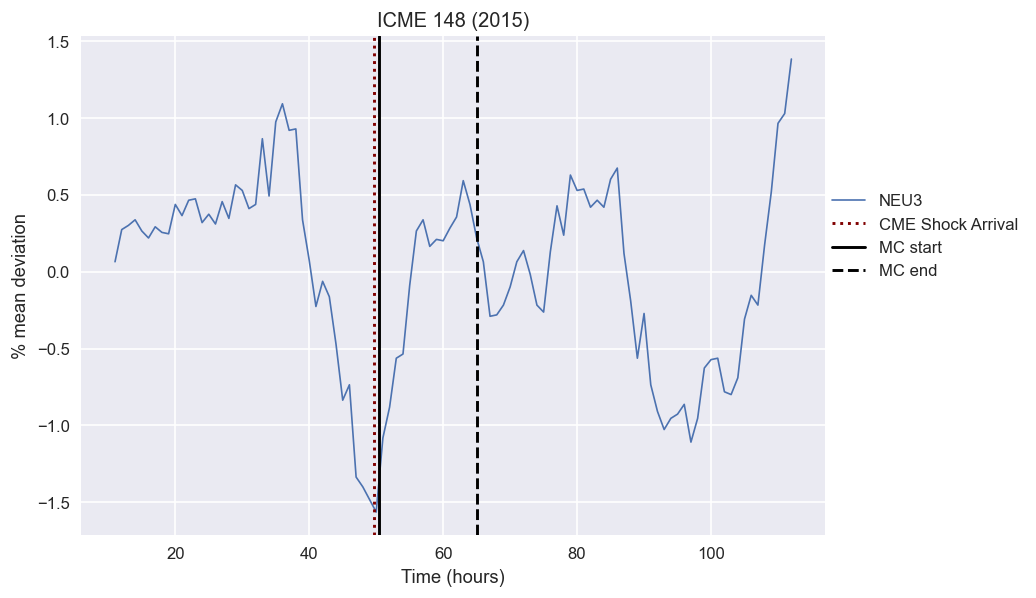

In [37]:
##### Plotting unsmoothed % mean deviation data 

plt.plot(time, percent_meandevi_neu3, linewidth=1, label='NEU3')  
#plt.plot(time, percent_meandevi_sopb, linewidth=1, label='SOPB') 
#plt.plot(time, percent_meandevi_sopo, linewidth=1, label='SOPO') 
#plt.plot(time, percent_meandevi_mrny, linewidth=1, label='MRNY') 
#plt.plot(time, percent_meandevi_tera, linewidth=1, label='TERA') 

# Labelling axes
plt.xlabel('Time (hours)')
plt.ylabel(f"% mean deviation")

# Zoom
#plt.xlim(40,70)

# Shock and MC start and end times
plt.axvline(49.63, color='maroon', linestyle=':', label='CME Shock Arrival')
plt.axvline(50.47, color='black', label='MC start')
plt.axvline(65.1, color='black', linestyle='--', label="MC end")


# Cosmetics
plt.style.use('seaborn')
plt.title("ICME 148 (2015)")
plt.legend(loc=(1,0.50))
plt.show()


## Step 6 - Smoothening % mean deviation data

In [38]:
##### Smoothening out % mean deviation data as well

##### Defining centralised moving averages over "window" length of hours using Pandas, all stations' data
d = pd.Series(percent_meandevi_neu3 )
mavg_cent_percent_meandevi_neu3 = d.rolling(window).mean()

d = pd.Series(percent_meandevi_sopb )
mavg_cent_percent_meandevi_sopb = d.rolling(window).mean()

d = pd.Series(percent_meandevi_sopo )
mavg_cent_percent_meandevi_sopo = d.rolling(window).mean()

d = pd.Series(percent_meandevi_mrny )
mavg_cent_percent_meandevi_mrny = d.rolling(window).mean()

d = pd.Series(percent_meandevi_tera )
mavg_cent_percent_meandevi_tera = d.rolling(window).mean()

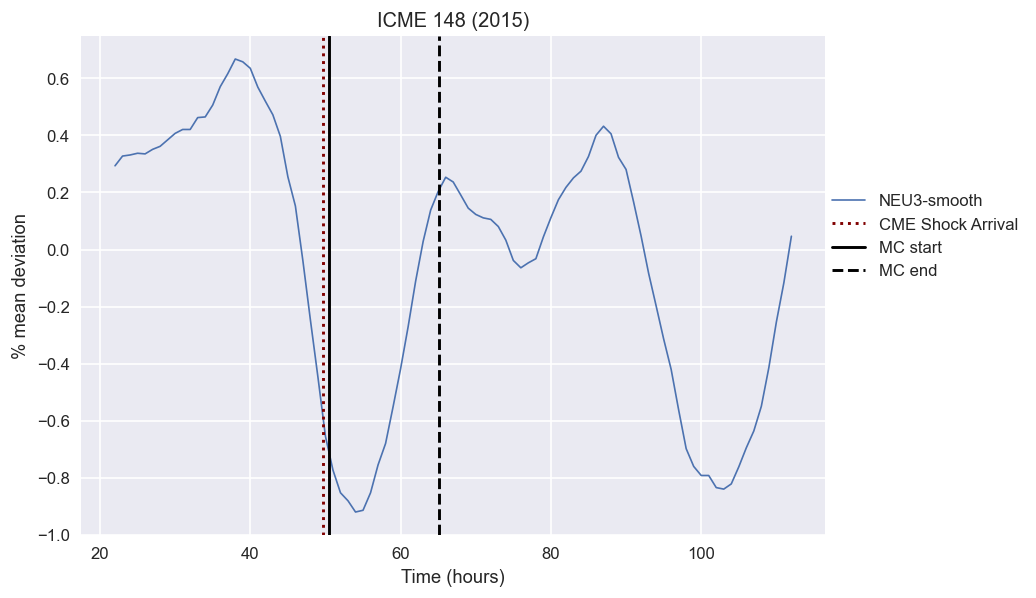

In [39]:
##### Plotting smoothed % mean deviation values for all NM stations

plt.plot(time, mavg_cent_percent_meandevi_neu3, linewidth=1, label='NEU3-smooth')  
#plt.plot(time, mavg_cent_percent_meandevi_sopb, linewidth=1, label='SOPB-smooth') 
#plt.plot(time, mavg_cent_percent_meandevi_sopo, linewidth=1, label='SOPO-smooth') 
#plt.plot(time, mavg_cent_percent_meandevi_mrny, linewidth=1, label='MRNY-smooth') 
#plt.plot(time, mavg_cent_percent_meandevi_tera, linewidth=1, label='TERA-smooth') 

# Labelling axes
plt.xlabel('Time (hours)')
plt.ylabel(f"% mean deviation")

# Zoom
#plt.xlim(40,70)

# Shock and MC start and end times
plt.axvline(49.63, color='maroon', linestyle=':', label='CME Shock Arrival')
plt.axvline(50.47, color='black', label='MC start')
plt.axvline(65.1, color='black', linestyle='--', label="MC end")


# Cosmetics
plt.style.use('seaborn')
plt.title("ICME 148 (2015)")
plt.legend(loc=(1,0.50))
plt.show()

In [6]:
# Making single function to generate all plots conditionally - 

def analyze(filename, station, window1, plot, plotname, shock, mcstart, mcend):

    #### Reading data from csv
    df = read_csv(filename, delimiter=';',header=None)
    sopb, sopo, mrny, tera = df[1],df[2],df[3],df[4]
    time = np.array([i for i in range(0,len(df[2]))])
    
    #### Trailing rolling average 
    #d = pd.Series(neu3)
    #mavg_trail_neu3 = d.rolling(window1).mean()

    d = pd.Series(sopb)
    mavg_trail_sopb = d.rolling(window1).mean()

    d = pd.Series(sopo)
    mavg_trail_sopo = d.rolling(window1).mean()

    d = pd.Series(mrny)
    mavg_trail_mrny = d.rolling(window1).mean()

    d = pd.Series(tera)
    mavg_trail_tera = d.rolling(window1).mean()
    
    ### Arithmetic means of smoothed NM data for all stations to find % deviation from
    #avg_neu3_smooth = np.mean(mavg_trail_neu3)
    avg_sopb_smooth = np.mean(mavg_trail_sopb)
    avg_sopo_smooth = np.mean(mavg_trail_sopo)
    avg_mrny_smooth = np.mean(mavg_trail_mrny)
    avg_tera_smooth = np.mean(mavg_trail_tera)
    
    ### Constructing % mean deviation arrays for each station using average values of smoothed data calculated
    
    #percent_meandevi_neu3    = np.empty(len(mavg_trail_neu3))
    #for i in range(0,len(mavg_trail_neu3)):
        #percent_meandevi_neu3[i] = ((mavg_trail_neu3[i] - avg_neu3_smooth)/avg_neu3_smooth)*100
        
    percent_meandevi_sopb = np.zeros(len(mavg_trail_sopb))
    for i in range(0,len(mavg_trail_sopb)):
        percent_meandevi_sopb[i] = ((mavg_trail_sopb[i] - avg_sopb_smooth)/avg_sopb_smooth)*100
        
    percent_meandevi_sopo = np.zeros(len(mavg_trail_sopo))
    for i in range(0,len(mavg_trail_sopo)):
        percent_meandevi_sopo[i] = ((mavg_trail_sopo[i] - avg_sopo_smooth)/avg_sopo_smooth)*100
    
    percent_meandevi_mrny = np.zeros(len(mavg_trail_mrny))
    for i in range(0,len(mavg_trail_mrny)):
        percent_meandevi_mrny[i] = ((mavg_trail_mrny[i] - avg_mrny_smooth)/avg_mrny_smooth)*100
    
    percent_meandevi_tera = np.zeros(len(mavg_trail_tera))    
    for i in range(0,len(mavg_trail_tera)):
        percent_meandevi_tera[i] = ((mavg_trail_tera[i] - avg_tera_smooth)/avg_tera_smooth)*100
            
    ### Trail-Smoothening out % mean deviation data as well

    #d = pd.Series(percent_meandevi_neu3 )
    #mavg_trail_percent_meandevi_neu3 = d.rolling(window1).mean()

    d = pd.Series(percent_meandevi_sopb )
    mavg_trail_percent_meandevi_sopb = d.rolling(window1).mean()

    d = pd.Series(percent_meandevi_sopo )
    mavg_trail_percent_meandevi_sopo = d.rolling(window1).mean()

    d = pd.Series(percent_meandevi_mrny )
    mavg_trail_percent_meandevi_mrny = d.rolling(window1).mean()

    d = pd.Series(percent_meandevi_tera )
    mavg_trail_percent_meandevi_tera = d.rolling(window1).mean()   
    
    # Now writing code for plotting according to parameter feeded
    
    if station == "NEU3":
        if plot == "Smoothed":
            # Plotting
            plt.plot(time, mavg_trail_neu3, linewidth=1, label= 'NEU3-Trail-Smoothed' )
            plt.plot(time, neu3, linewidth=1, label='NEU3-1hr-data' )
            plt.xlabel("Time (hours)")
            plt.ylabel("Counts/s")
            
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()
                
        elif plot == "Percentdev_raw":
            # Plotting
            plt.plot(time, percent_meandevi_neu3, linewidth=1, label='NEU3')
            plt.xlabel("Time (hours)")
            plt.ylabel(f"% mean deviation")
                                
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()
        
        elif plot == "Percentdev_smooth":
            # Plotting
            plt.plot(time, mavg_trail_percent_meandevi_neu3, linewidth=1, label='NEU3-Trail-Smoothed')
            plt.xlabel("Time (hours)")
            plt.ylabel(f"% mean deviation")
                                
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()                
        
        else:
            print("Error in type of plot")
    
    elif station == "SOPB":
        if plot == "Smoothed":
            # Plotting
            plt.plot(time, mavg_trail_sopb, linewidth=1, label='SOPB-Trail-Smoothed' )
            plt.plot(time, sopb, linewidth=1, label='SOPB-1hr-data' )
            plt.xlabel("Time (hours)")
            plt.ylabel("Counts/s")
            
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()
                
        elif plot == "Percentdev_raw":
            # Plotting
            plt.plot(time, percent_meandevi_sopb, linewidth=1, label='SOPB')
            plt.xlabel("Time (hours)")
            plt.ylabel(f"% mean deviation")
                                
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()
        
        elif plot == "Percentdev_smooth":
            # Plotting
            plt.plot(time, mavg_trail_percent_meandevi_sopb, linewidth=1, label='SOPB-Trail-Smoothed')
            plt.xlabel("Time (hours)")
            plt.ylabel(f"% mean deviation")
                                
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()                
        
        else:
            print("Error in type of plot")

    elif station == "SOPO":
        if plot == "Smoothed":
            # Plotting
            plt.plot(time, mavg_trail_sopo, linewidth=1, label='SOPO-Trail-Smoothed' )
            plt.plot(time, sopo, linewidth=1, label='SOPO-1hr-data' )
            plt.xlabel("Time (hours)")
            plt.ylabel("Counts/s")
            
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()
                
        elif plot == "Percentdev_raw":
            # Plotting
            plt.plot(time, percent_meandevi_sopo, linewidth=1, label='SOPO')
            plt.xlabel("Time (hours)")
            plt.ylabel(f"% mean deviation")
                                
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()
        
        elif plot == "Percentdev_smooth":
            # Plotting
            plt.plot(time, mavg_trail_percent_meandevi_sopo, linewidth=1, label='SOPO-Trail-Smoothed')
            plt.xlabel("Time (hours)")
            plt.ylabel(f"% mean deviation")
                                
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()                
        
        else:
            print("Error in type of plot")

    elif station == "MRNY":
        if plot == "Smoothed":
            # Plotting
            plt.plot(time, mavg_trail_mrny, linewidth=1, label='MRNY-Trail-Smoothed' )
            plt.plot(time, mrny, linewidth=1, label='MRNY-1hr-data' )
            plt.xlabel("Time (hours)")
            plt.ylabel("Counts/s")
            
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()
                
        elif plot == "Percentdev_raw":
            # Plotting
            plt.plot(time, percent_meandevi_mrny, linewidth=1, label='MRNY')
            plt.xlabel("Time (hours)")
            plt.ylabel(f"% mean deviation")
                                
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()
        
        elif plot == "Percentdev_smooth":
            # Plotting
            plt.plot(time, mavg_trail_percent_meandevi_mrny, linewidth=1, label='MRNY-Trail-Smoothed')
            plt.xlabel("Time (hours)")
            plt.ylabel(f"% mean deviation")
                                
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()                
        
        else:
            print("Error in type of plot")

    elif station == "TERA":
        if plot == "Smoothed":
            # Plotting
            plt.plot(time, mavg_trail_tera, linewidth=1, label='TERA-Trail-Smoothed' )
            plt.plot(time, tera, linewidth=1, label='TERA-1hr-data' )
            plt.xlabel("Time (hours)")
            plt.ylabel("Counts/s")
            
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()
                
        elif plot == "Percentdev_raw":
            # Plotting
            plt.plot(time, percent_meandevi_tera, linewidth=1, label='TERA')
            plt.xlabel("Time (hours)")
            plt.ylabel(f"% mean deviation")
                                
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()
        
        elif plot == "Percentdev_smooth":
            # Plotting
            plt.plot(time, mavg_trail_percent_meandevi_tera, linewidth=1, label='TERA-Trail-Smoothed')
            plt.xlabel("Time (hours)")
            plt.ylabel(f"% mean deviation")
                                
            # 3 time stamps
            plt.axvline(shock, color='maroon', linestyle=':', label='CME Shock Arrival')
            plt.axvline(mcstart, color='black', label='MC start')
            plt.axvline(mcend, color='black', linestyle='--', label="MC end")
                
            # Cosmetics
            plt.style.use('seaborn')
            plt.legend(loc=(1,0.70))
            plt.title(plotname)
            plt.show()                
        
        else:
            print("Error in type of plot")
    else:
        print("Error in station name")
            

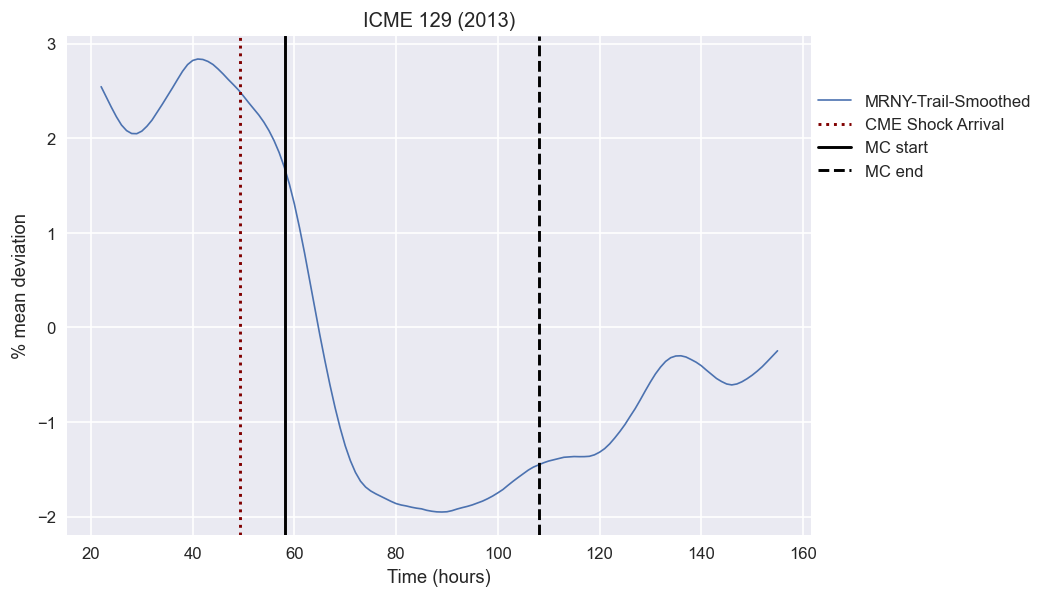

In [7]:
analyze("2013_lowrig.txt", "MRNY", 12, "Percentdev_smooth", "ICME 129 (2013)", 49.35, 58.15, 108.07)

## Questions & contentions - 

1) What should be an optimal smoothing window length for the NM data? Why 12 hours? 

2) What kind of moving average is appropriate? Trailing, Central, or Something else? Also do we need to adjust the ICME times after smoothing out data, depending on the kind of smoothing done?

3) How are the start and end times of MCs and CME shock arrivals calculated in Bhattacharjee et al (2022)? Directly obtained from WIND spacecraft? Christopher Light et al has an interesting method to calculate start and end times for quick decreases in NM data i.e. potential FDs. How does WIND do this? 


# Trash from here

In [ ]:
## Making functions to plot relevant graphs directly on feeding text file

def plot_smooth(filename,rawdata, window): 
    
    # Reading data from csv
    df = read_csv(filename, delimiter=';',header=None)
    neu3, sopb, sopo, mrny, tera = df[1],df[2],df[3],df[4],df[5]
    time = np.array([i for i in range(0,len(df[2]))])
    #plt.subplot(rows, columns,1)
    
    # Centered rolling average 
    d = pd.Series(neu3)
    mavg_cent_neu3 = d.rolling(window).mean()

    d = pd.Series(sopb)
    mavg_cent_sopb = d.rolling(window).mean()

    d = pd.Series(sopo)
    mavg_cent_sopo = d.rolling(window).mean()

    d = pd.Series(mrny)
    mavg_cent_mrny = d.rolling(window).mean()

    d = pd.Series(tera)
    mavg_cent_tera = d.rolling(window).mean()


    ####### Plotting 12-hour centrally smoothed NM data and actual NM data for all stations individually
    ####### Please plot only one station at a time to observe clearly, code written for all 
    
    if rawdata == "NEU3":
        plt.plot(time, mavg_cent_neu3, linewidth=1, label='NEU3-Cent-Smooth' )
        plt.plot(time, neu3, linewidth=1, label='NEU3' )
        
    elif rawdata == "SOPB":
        plt.plot(time, mavg_cent_sopb, linewidth=1, label='SOPB-Cent-Smooth' )
        plt.plot(time, sopb, linewidth=1, label='SOPB' )

    elif rawdata == "SOPO":
        plt.plot(time, mavg_cent_sopo, linewidth=1, label='SOPO-Cent-Smooth' )
        plt.plot(time, sopo, linewidth=1, label='SOPO' )

    elif rawdata == "MRNY":
        plt.plot(time, mavg_cent_mrny, linewidth=1, label='MRNY-Cent-Smooth-12hr' )
        plt.plot(time, mrny, linewidth=1, label='MRNY 1hr data' )
    
    elif rawdata == "TERA": 
        plt.plot(time, mavg_cent_tera, linewidth=1, label='TERA-Cent-Smooth' )
        plt.plot(time, tera, linewidth=1, label='TERA' )
    else :
        print("Error in station name or filename")

    # Labelling axes
    plt.xlabel('Time (hours)')
    plt.ylabel("Counts/s")
    plt.legend()
    plt.show()
    
    return mavg_cent_neu3, mavg_cent_sopb, mavg_cent_sopo, mavg_cent_mrny, mavg_cent_tera, time
    

def percentdev_raw(filename, rawdata, window):
    mavg_cent_neu3,mavg_cent_sopb,mavg_cent_sopo,mavg_cent_mrny,mavg_cent_tera,time = plot_smooth(filename,rawdata,window)
    
    ###### Arithmetic means of smoothed NM data for all stations to find % deviation from
    avg_neu3_smooth = np.mean(mavg_cent_neu3)
    avg_sopb_smooth = np.mean(mavg_cent_sopb)
    avg_sopo_smooth = np.mean(mavg_cent_sopo)
    avg_mrny_smooth = np.mean(mavg_cent_mrny)
    avg_tera_smooth = np.mean(mavg_cent_tera)


    ##### Constructing % mean deviation arrays for each station using average values of smoothed data calculated
    for i in range(0,len(mavg_cent_neu3)):
        percent_meandevi_neu3    = np.empty(len(mavg_cent_neu3))
        percent_meandevi_neu3[i] = ((mavg_cent_neu3[i] - avg_neu3_smooth)/avg_neu3_smooth)*100

    for i in range(0,len(mavg_cent_sopb)):
        percent_meandevi_sopb    = np.empty(len(mavg_cent_sopb))
        percent_meandevi_sopb[i] = ((mavg_cent_sopb[i] - avg_sopb_smooth)/avg_sopb_smooth)*100

    for i in range(0,len(mavg_cent_sopo)):
        percent_meandevi_sopo    = np.empty(len(mavg_cent_sopo))
        percent_meandevi_sopo[i] = ((mavg_cent_sopo[i] - avg_sopo_smooth)/avg_sopo_smooth)*100

    for i in range(0,len(mavg_cent_mrny)):
        percent_meandevi_mrny    = np.empty(len(mavg_cent_mrny))
        percent_meandevi_mrny[i] = ((mavg_cent_mrny[i] - avg_mrny_smooth)/avg_mrny_smooth)*100

    for i in range(0,len(mavg_cent_tera)):
        percent_meandevi_tera    = np.empty(len(mavg_cent_tera))
        percent_meandevi_tera[i] = ((mavg_cent_tera[i] - avg_tera_smooth)/avg_tera_smooth)*100
        
    ##### Plotting unsmoothed % mean deviation data 

    if rawdata == "NEU3":
        plt.plot(time, percent_meandevi_neu3, linewidth=1, label='NEU3')
    
    elif rawdata == "SOPB":
        plt.plot(time, percent_meandevi_sopb, linewidth=1, label='SOPB') 
    
    elif rawdata == "SOPO":
        plt.plot(time, percent_meandevi_sopo, linewidth=1, label='SOPO')
    
    elif rawdata == "MRNY":
        plt.plot(time, percent_meandevi_mrny, linewidth=1, label='MRNY')
    
    elif rawdata == "TERA":
        plt.plot(time, percent_meandevi_tera, linewidth=1, label='TERA')
    
    else: 
        print("Error in station name or filename")

    # Labelling axes
    plt.xlabel('Time (hours)')
    plt.ylabel(f"% mean deviation")
    plt.show()
    
    return percent_meandevi_neu3, percent_meandevi_sopb, percent_meandevi_sopo,
    percent_meandevi_mrny, percent_meandevi_tera, time
    


def percentdev_smooth(filename, rawdata, window):
    percent_meandevi_neu3, percent_meandevi_sopb, percent_meandevi_sopo,
    percent_meandevi_mrny, percent_meandevi_tera, time = percentdev_raw(filename, rawdata, window) 
    
    ##### Smoothening out % mean deviation data as well

    d = pd.Series(percent_meandevi_neu3 )
    mavg_cent_percent_meandevi_neu3 = d.rolling(window).mean()

    d = pd.Series(percent_meandevi_sopb )
    mavg_cent_percent_meandevi_sopb = d.rolling(window).mean()

    d = pd.Series(percent_meandevi_sopo )
    mavg_cent_percent_meandevi_sopo = d.rolling(window).mean()

    d = pd.Series(percent_meandevi_mrny )
    mavg_cent_percent_meandevi_mrny = d.rolling(window).mean()

    d = pd.Series(percent_meandevi_tera )
    mavg_cent_percent_meandevi_tera = d.rolling(window).mean()
    
    #### Plotting smoothed % mean deviation for all stations 
    
    if rawdata == "NEU3":
        plt.plot(time, mavg_cent_percent_meandevi_neu3, linewidth=1, label='NEU3-smooth') 
    elif rawdata == "SOPB":
        plt.plot(time, mavg_cent_percent_meandevi_sopb, linewidth=1, label='SOPB-smooth')
    elif rawdata == "SOPO":
        plt.plot(time, mavg_cent_percent_meandevi_sopo, linewidth=1, label='SOPO-smooth') 
    elif rawdata == "MRNY":
        plt.plot(time, mavg_cent_percent_meandevi_mrny, linewidth=1, label='MRNY-smooth') 
    elif rawdata == "TERA":
        plt.plot(time, mavg_cent_percent_meandevi_tera, linewidth=1, label='TERA-smooth') 
    else: 
        print("Error in station name or file name")

    # Labelling axes
    plt.xlabel('Time (hours)')
    plt.ylabel(f"% mean deviation")
    plt.show()


In [ ]:
##### 2014 ######

#print(plot_smooth("2015_lowrig.txt", "TERA", 12))
print(percentdev_smooth("2015_lowrig.txt", "MRNY", 12))
plt.legend()
